# The Central Limit Theorem
<hr>

Let $\{X_1, X_2, ..., X_n\}$ be random variables sampled independently from the same distribution with mean $\mu$ and variance $\sigma^2$. Let $\bar{X_n}$ be the average of $X_1, X_2, ..., X_n$ then for any fixed number x we have 

$$\lim_{n \rightarrow \infty}P(\frac{\bar{X_n}-\mu}{\sigma / \sqrt{n}} \le x) = \lim_{n \rightarrow \infty}P(\frac{\sqrt{n}}{\sigma}(\bar{X_n} - \mu) \le x) = \Phi(x)$$

where $\Phi(x)$ is the standard normal cumulative density function.

## In other words

For almost any distribution with mean, $\mu$, and variance, $\sigma^2$, if we take samples of size n from it sufficiently many times, then the average of the n variables $\bar{X_n}$ approximates a normal distribution with mean $\mu$ and variance $\sigma^2/n$ as we increase the sample size.

$$
E(\bar{X_n}) = \mu
$$

$$
V(\bar{X_n}) = \sigma^2/n
$$

This means if we take a large enough sample from any distribution the mean will be normally distributed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from warnings import filterwarnings

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
mpl.rcParams['figure.figsize'] = (10, 6)
filterwarnings('ignore')
sns.set()

## Example

We can create any distribution we want and show the CLT holds.

In [2]:
# We create a random distribution 
dist1 = np.random.randint(1, 11, 500)
dist2 = np.random.randint(8, 11, 500)
dist = np.concatenate((dist1, dist2))

values, counts = np.unique(dist, return_counts=True)
probs = counts / counts.sum()

distribution = dict(zip(values, probs))
print(f'the distribution: {distribution}\n')
# NOTE: For every value in our distribution, 
# the sum of all the probabilities should equal 1.
print(f'sum of the distributions probabilities: {round(sum(distribution.values()), 4)}')

the distribution: {np.int64(1): np.float64(0.048), np.int64(2): np.float64(0.058), np.int64(3): np.float64(0.039), np.int64(4): np.float64(0.049), np.int64(5): np.float64(0.057), np.int64(6): np.float64(0.051), np.int64(7): np.float64(0.043), np.int64(8): np.float64(0.213), np.int64(9): np.float64(0.247), np.int64(10): np.float64(0.195)}

sum of the distributions probabilities: 1.0


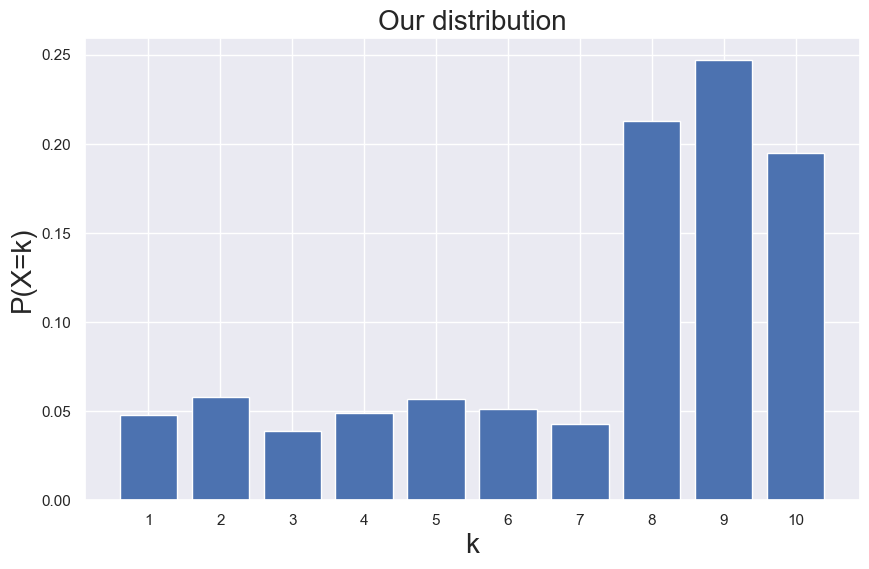

In [3]:
plt.bar(distribution.keys(), distribution.values())
plt.title('Our distribution', fontsize=20)
plt.xticks(range(1,11))
plt.xlabel('k', fontsize=20)
plt.ylabel('P(X=k)', fontsize=20);

For any probability distribution, we know how to calculate the mean/expectation, $\mu$, and the variance, $\sigma^2$:

$$
\mu = E(X) = \sum_k k * P(X=k)
$$

$$
\sigma^2 = V(X) = E(X^2) - [E(X)]^2 = \\
= \sum_k \Big[k^2 * P(X=k)\Big] - [E(X)]^2
$$

In [4]:
dist_vals = values
dist_probs = probs

dist_mean = (dist_vals * dist_probs).sum()
dist_variance = ((dist_vals**2) * dist_probs).sum() - dist_mean**2
dist_std = np.sqrt(dist_variance)

print(f'''μ  = {dist_mean:.3f}
σ = {dist_std:.3f}''')

μ  = 7.246
σ = 2.724


Above we calculated the theoretical mean, $\mu$, and standard deviation, $\sigma$, of our distribution.

Now if we repeat taking samples from this distribution and finding the average of those samples then the distribution of these averages should be normally distributed with mean, $\mu$, and standard deviation, $\frac{\sigma}{\sqrt{n}}$. Furthermore, the bigger our sample size (n) the more normal the distribution of the sample means will look.

So here's the process:
1. Sample n points from the distribution.
2. Calculate the mean.
3. Repeat 10,000 times.
4. Plot the distribution of the means (spoiler it should look normal).

We'll start with a sample size of $n=4$ plot the distribution of means and repeat with increasing sample sizes. We should see the histograms start to look more and more normally distributed as we icrease n.

In [5]:
n = 4
means = []
for _ in range(10_000):
    # We sample 4 values from the distribution per iteration.
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

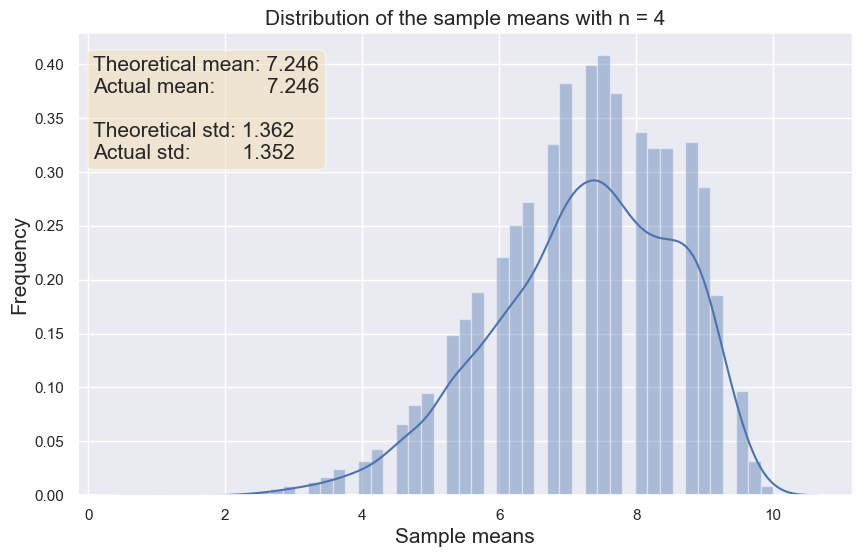

In [6]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

If we increase our sample size and repeat the process we should get more accurate results. Let's try with a sample size $n = 10$.

In [7]:
n = 10
means = []
for _ in range(10_000):
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

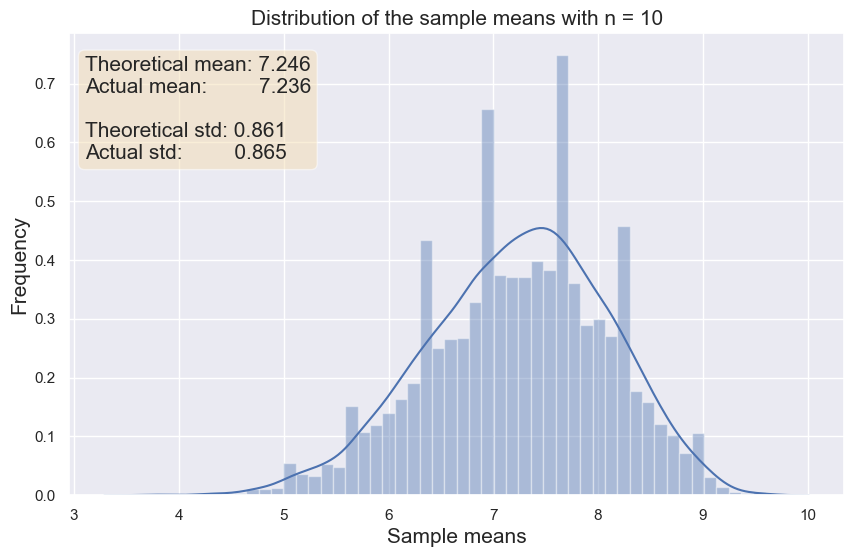

In [8]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

The results look much better! We'll do it one more time with a sample size of $n = 20$. Then we'll redo the process with an even weirder distribution.

In [9]:
n = 20
means = []
for _ in range(10_000):
    # Take a sample of size 10 according to the probabilities.
    sample = np.random.choice(dist_vals, p=dist_probs, size=n)
    means.append(sample.mean())
means = np.array(means)

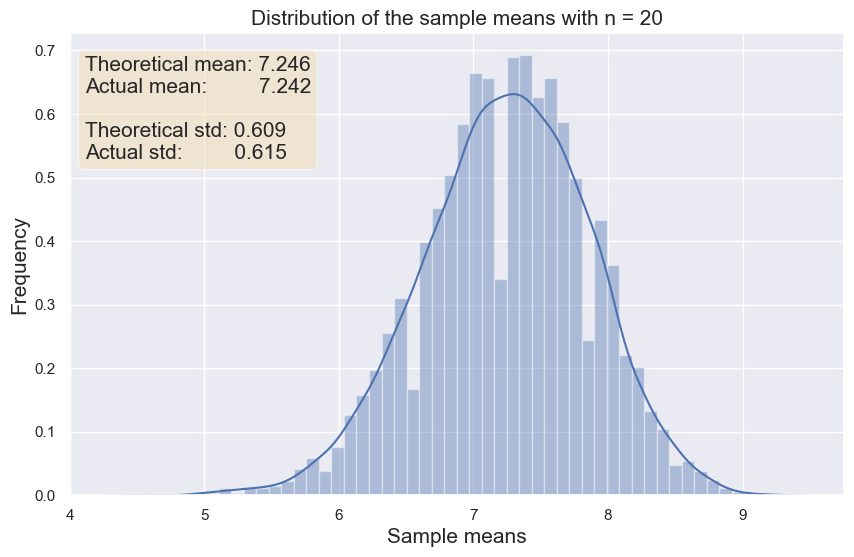

In [10]:
text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
    verticalalignment='top', bbox=props)

plt.xlabel('Sample means', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.distplot(means)
plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
plt.show()

Let's refactor everything we've done into a function that accepts a distribution and sample size and gives us the distribution of sample means.

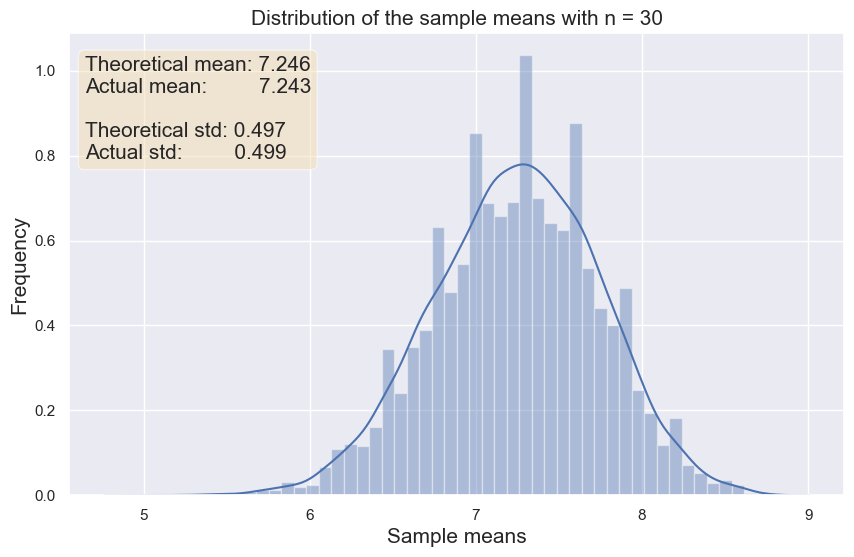

In [11]:
def clt(dist, n):
    '''
    The function takes in the distribution and sample size and plots the distribution of the
    sample means as shown above in order to display the central limit theorem.
    
    ==========================================================================
    
    Parameters: 
        dist - A dictionary where the keys are the values of the distribution
               and the values are their corresponding probabilities.
        
        n - The sample size to use.
    '''
    dist_vals = np.array(list(dist.keys()))
    dist_probs = np.array(list(dist.values()))

    dist_mean = (dist_vals * dist_probs).sum()
    dist_std = np.sqrt(np.sum((dist_vals**2) * dist_probs) - dist_mean**2)

    means = []
    for _ in range(10_000):
        # Take a sample of size 4 according to the probabilities.
        sample = np.random.choice(dist_vals, p=dist_probs, size=n)
        means.append(sample.mean())
    means = np.array(means)
    
    text = f'''Theoretical mean: {dist_mean:.3f}
Actual mean:         {means.mean():.3f}

Theoretical std: {dist_std / np.sqrt(n):.3f}
Actual std:         {means.std():.3f}'''

    plt.text(0.02, 0.95, text, transform=plt.gca().transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

    plt.xlabel('Sample means', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    sns.distplot(means)
    plt.title(f'Distribution of the sample means with n = {n}', fontsize=15)
    plt.show()

clt(distribution, n=30)

Now we'll define a different distribution to test the central limit theorem.

In [12]:
# create the new distribution
dist1 = np.random.randint(1,11, 500)
dist2 = np.random.randint(4,8, 500)
dist3 = np.random.randint(15, 21, 500)
dist4 = np.random.randint(17, 19, 500)
dist = np.concatenate((dist1, dist2, dist3, dist4))

values, counts = np.unique(dist, return_counts=True)
probs = counts / counts.sum()

distribution = dict(zip(values, probs))
print(f'the distribution: {distribution}\n')
print(f'sum of the distributions probabilities: {round(sum(distribution.values()), 4)}')

the distribution: {np.int64(1): np.float64(0.027), np.int64(2): np.float64(0.0215), np.int64(3): np.float64(0.0295), np.int64(4): np.float64(0.0865), np.int64(5): np.float64(0.096), np.int64(6): np.float64(0.0805), np.int64(7): np.float64(0.084), np.int64(8): np.float64(0.0245), np.int64(9): np.float64(0.026), np.int64(10): np.float64(0.0245), np.int64(15): np.float64(0.0475), np.int64(16): np.float64(0.0455), np.int64(17): np.float64(0.177), np.int64(18): np.float64(0.1555), np.int64(19): np.float64(0.0365), np.int64(20): np.float64(0.038)}

sum of the distributions probabilities: 1.0


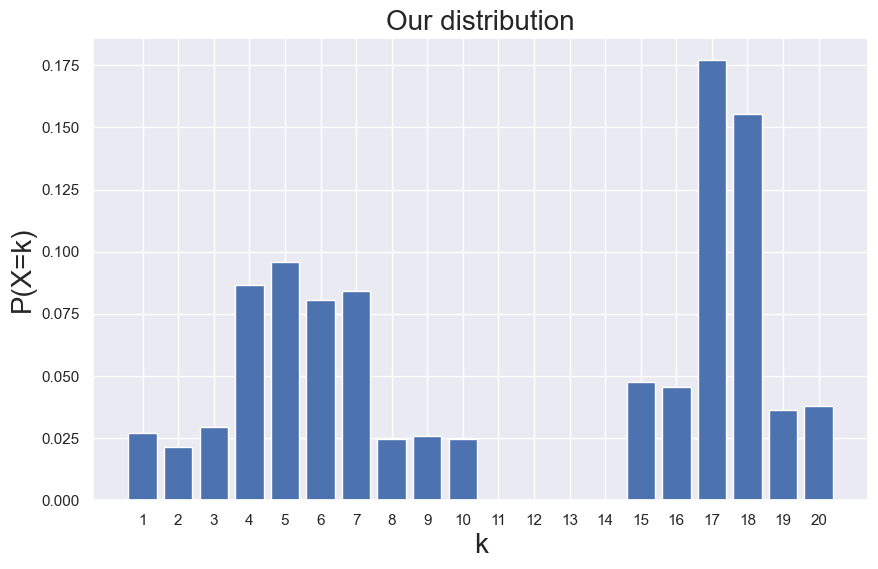

In [13]:
plt.bar(distribution.keys(), distribution.values())
plt.title('Our distribution', fontsize=20)
plt.xticks(range(1,21))
plt.xlabel('k', fontsize=20)
plt.ylabel('P(X=k)', fontsize=20);

We now have a distribution that takes on two different ranges of values. We'll see in this case the CLT still works.

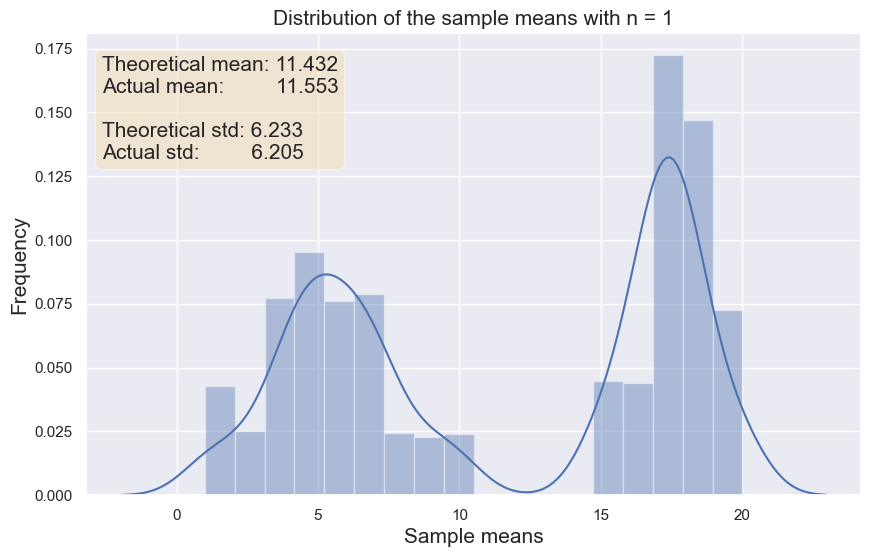

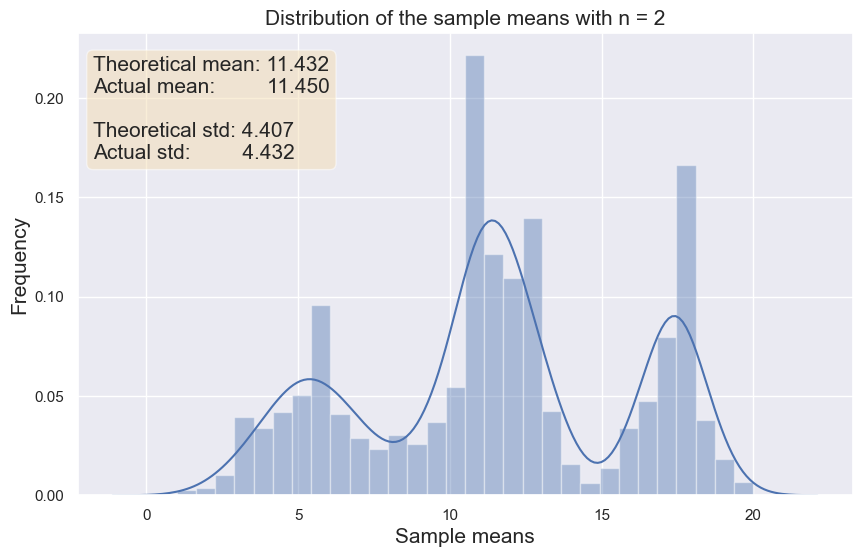

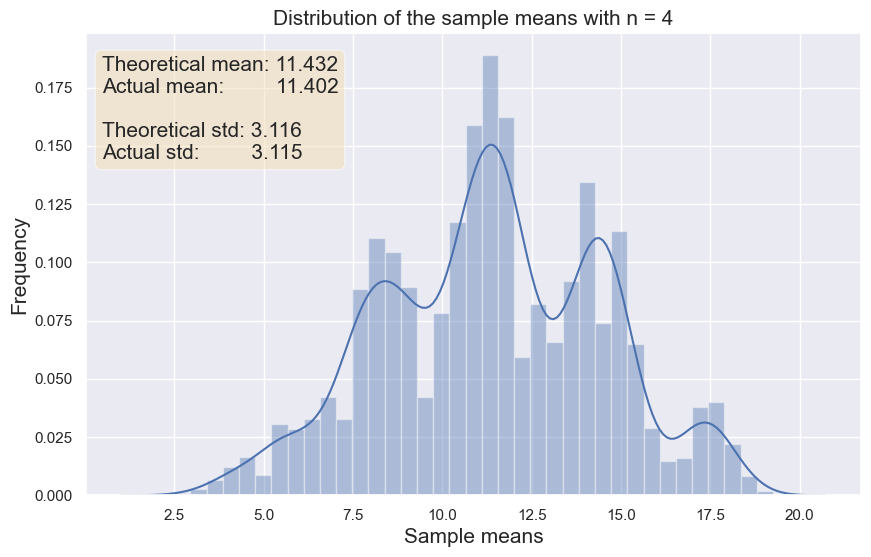

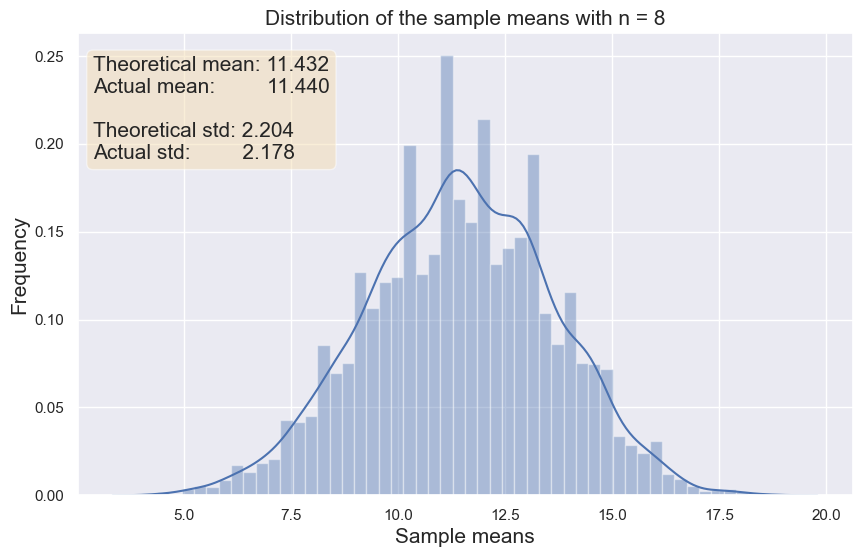

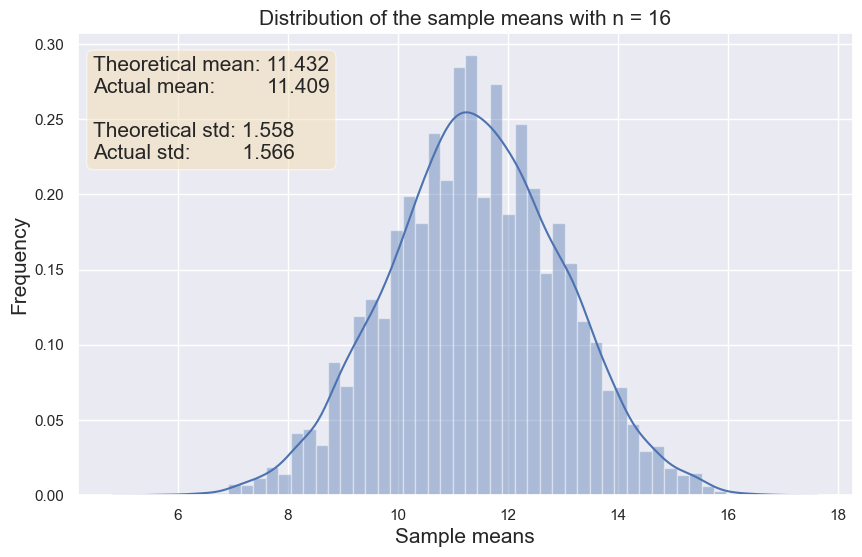

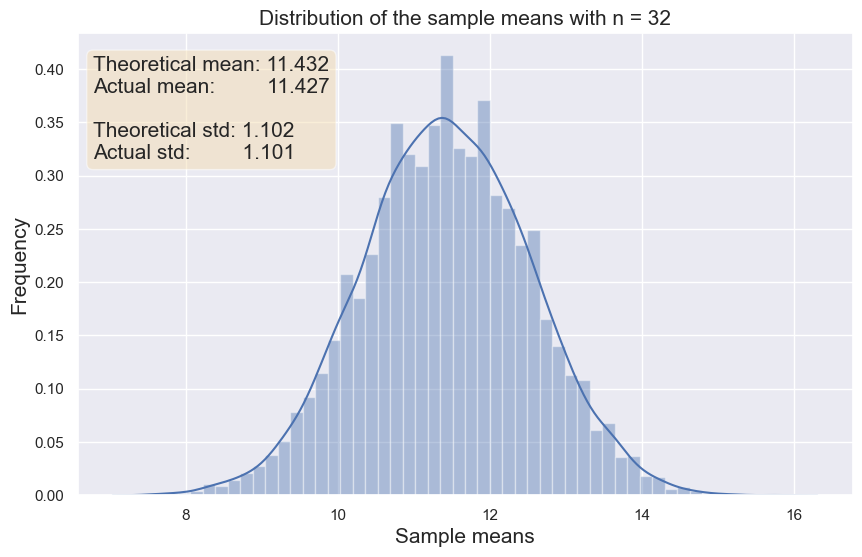

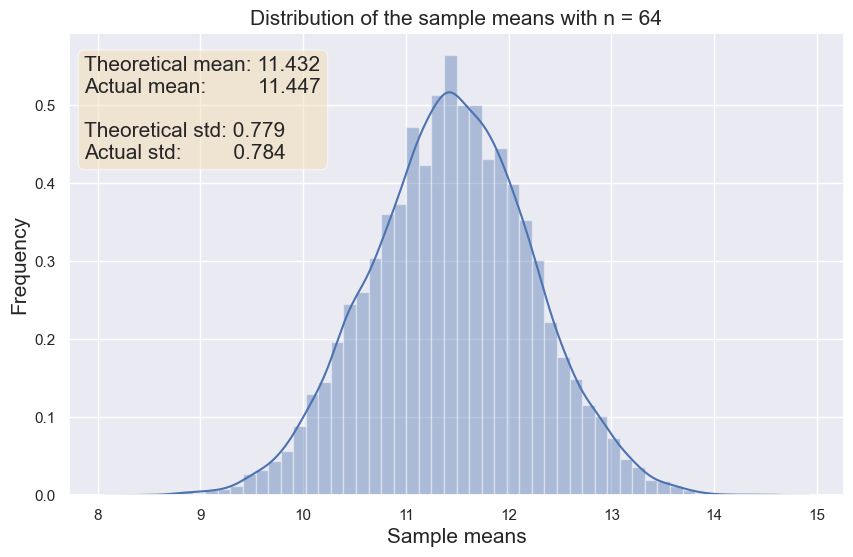

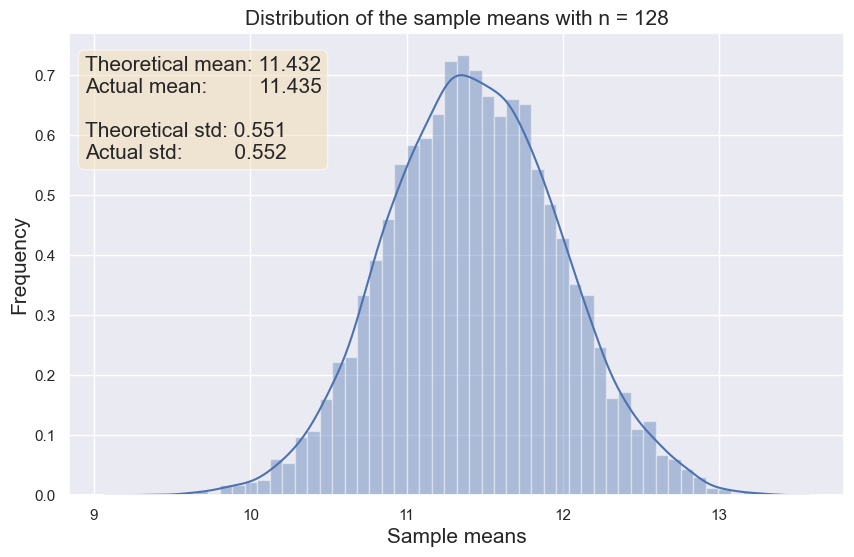

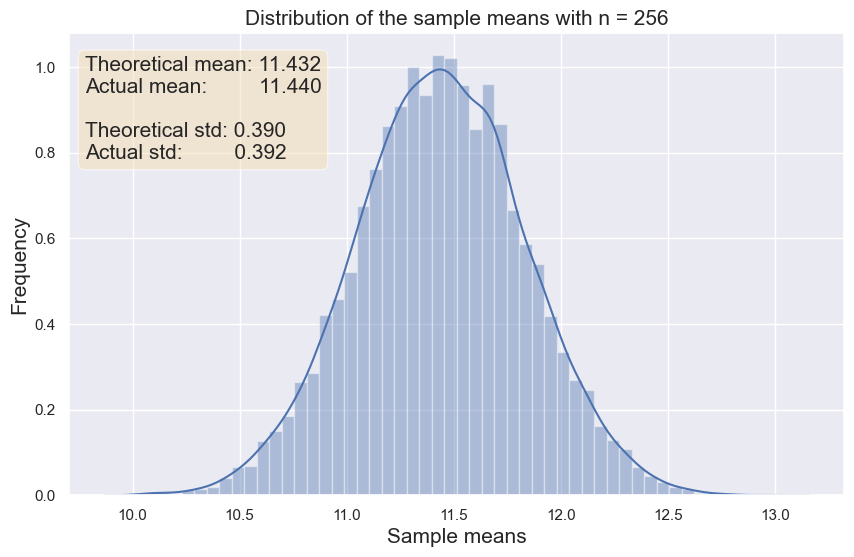

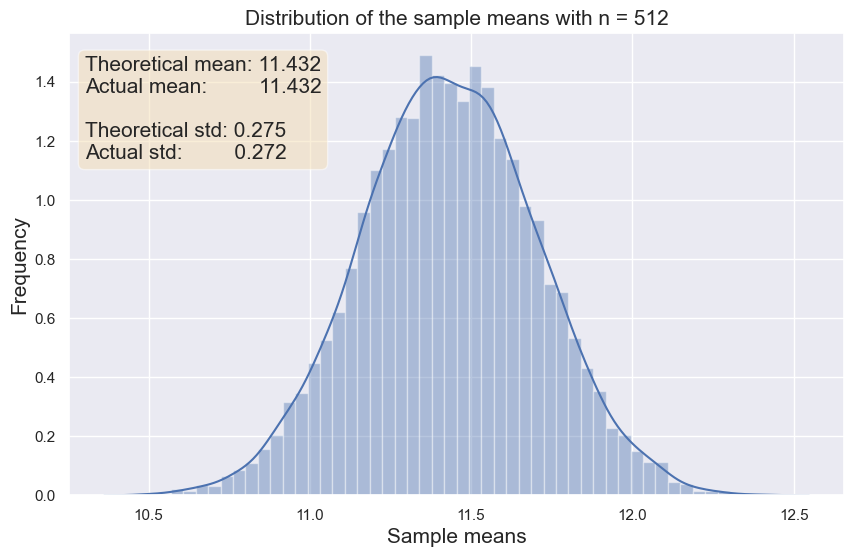

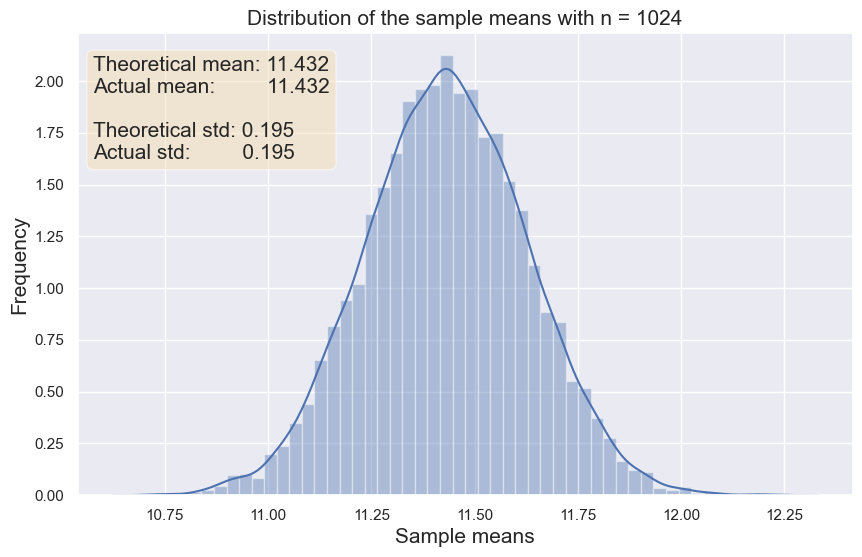

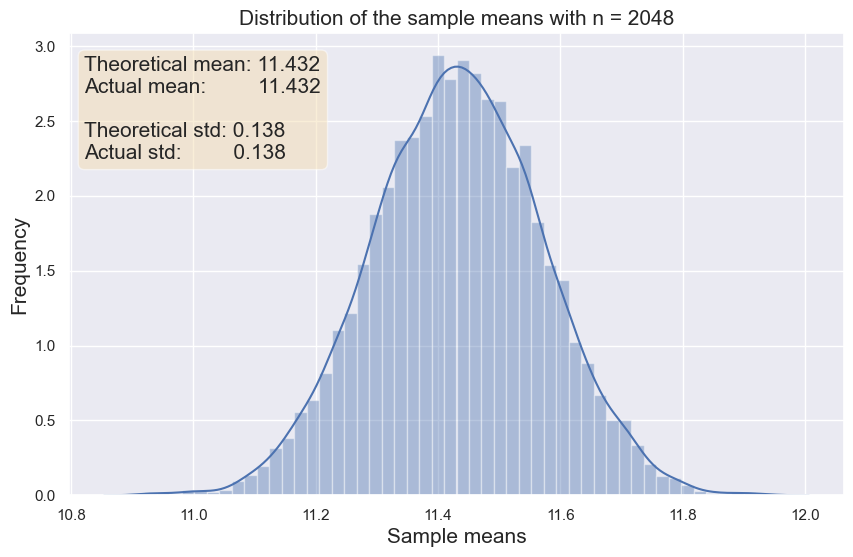

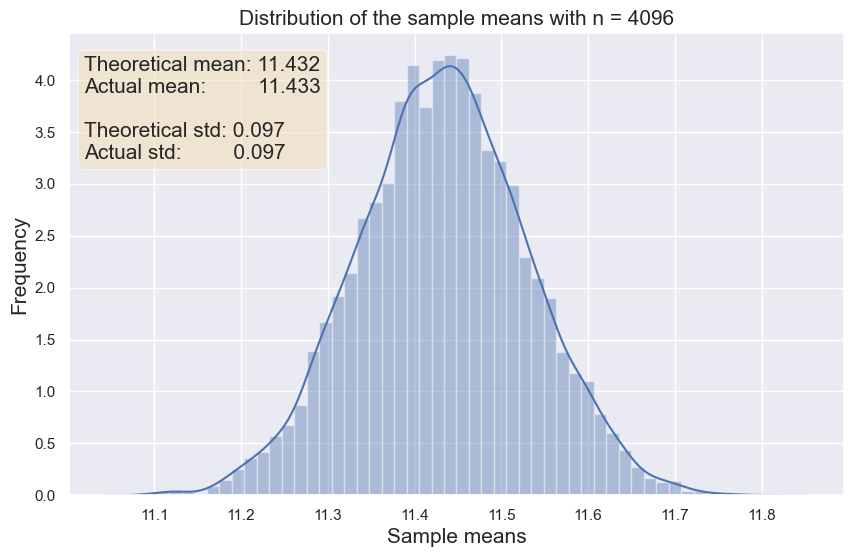

In [14]:
for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    clt(distribution, n)
    print('\n','='*80, '\n')